<a href="https://colab.research.google.com/github/HarrisonGrubb/DataScienceForBusinessAnalytics/blob/master/TS_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
!pip install sktime

In [29]:
!pip install pmdarima

     |████████████████████████████████| 1.5MB 2.7MB/s 
     |████████████████████████████████| 8.7MB 15.1MB/s 
     |████████████████████████████████| 2.1MB 28.1MB/s 
  Found existing installation: statsmodels 0.12.0
    Uninstalling statsmodels-0.12.0:
      Successfully uninstalled statsmodels-0.12.0
  Found existing installation: Cython 0.29.21
    Uninstalling Cython-0.29.21:
      Successfully uninstalled Cython-0.29.21


In [14]:
import pandas as pd
import seaborn as sns
import numpy as np
from sktime.datasets import load_airline
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.theta import ThetaForecaster
from sktime.forecasting.compose import RecursiveRegressionForecaster
from sktime.forecasting.arima import AutoARIMA
from sktime.performance_metrics.forecasting import smape_loss


In [15]:
y = load_airline()

In [16]:
y_train, y_test = temporal_train_test_split(y)

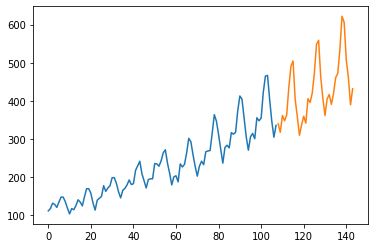

In [17]:
y_train.plot()
y_test.plot()

In [22]:
fh = np.arange(1, len(y_test) + 1)  # forecasting horizon

In [19]:
theta_forecaster = ThetaForecaster(sp=12)
auto_arima_forecaster = AutoARIMA(sp=12, suppress_warnings=True) 

In [25]:
theta_forecaster.fit(y_train,fh=fh)
theta_y_pred = theta_forecaster.predict(fh)

In [29]:
auto_arima_forecaster.fit(y_train,fh)
arima_y_pred = auto_arima_forecaster.predict(fh)

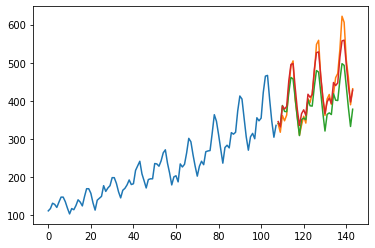

In [30]:
y_train.plot()
y_test.plot()
theta_y_pred.plot()
arima_y_pred.plot()

In [31]:
theta_error = smape_loss(y_test, theta_y_pred)
arima_error = smape_loss(y_test, arima_y_pred)

In [32]:
print('Theta Error', theta_error)
print('Arima Error', arima_error)

Theta Error 0.08661469103230263
Arima Error 0.04117062368222738
